In [188]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [189]:
# load in the dataset into a pandas dataframe
diamonds = pd.read_csv('diamonds.csv')

## Dataset Overview

Before running straight into the exploration, let's just take a moment to get a high-level overview of the dataset. We can refer back to these points if we need to get our bearings on what we should expect to see from each variable.

In [95]:
# high-level overview of data shape and composition
print(diamonds.shape)
print(diamonds.dtypes)
diamonds.head(10)

(53940, 12)
carat           float64
cut              object
color            object
clarity          object
depth           float64
table           float64
price             int64
x               float64
y               float64
z               float64
group          category
carat_group    category
dtype: object


,carat,cut,color,clarity,depth,table,price,x,y,z,group,carat_group
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,"(0, 2500]","(0.0, 0.5]"
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,"(0, 2500]","(0.0, 0.5]"
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,"(0, 2500]","(0.0, 0.5]"
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,"(0, 2500]","(0.0, 0.5]"
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,"(0, 2500]","(0.0, 0.5]"
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,"(0, 2500]","(0.0, 0.5]"
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47,"(0, 2500]","(0.0, 0.5]"
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53,"(0, 2500]","(0.0, 0.5]"
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49,"(0, 2500]","(0.0, 0.5]"
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39,"(0, 2500]","(0.0, 0.5]"


In [96]:
# descriptive statistics for numeric variables
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## Univariate Exploration

Let's start our exploration by looking at the main variable of interest: price. Is the distribution skewed or symmetric? Is it unimodal or multimodal?

mean price:  3932.799721913237
median price:  2401.0
variance:  15915629.424300838
max:  18823
min:  326
describe:  count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64
count $ < 5000:  39213
count $ > 5000:  14714
interquartile range:  4374.25
skewness:  1.618395283383529
percent under $8000:  85.89914720059325


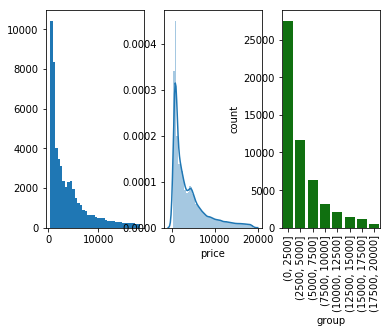

In [200]:
# univariate plot of diamond prices
# import for interquartile range
from scipy.stats import iqr

# isolate just the prices
p = diamonds['price']

# print mean, median, standard dev
print("mean price: ", p.mean())
print("median price: ", p.median())
print("variance: ", p.var())
print("max: ", p.max())
print("min: ", p.min())
print("describe: ", diamonds['price'].describe(include='all'))
print("count $ < 5000: ", p[p<5000].count())
print("count $ > 5000: ", p[p>5000].count())


# gets the range betwen the 75 and 25 percentile to see outliers
print("interquartile range: ", iqr(p))

# gets the skewness, if less than -1 or greater than +1 is
#highley skewed, symetric is between -1/2 and 1/2
print("skewness: ", p.skew())

# created price groups by 2500 intervals
group = [0, 2500, 5000, 7500, 10000, 12500, 15000, 17500, 20000]
diamonds['group'] = pd.cut(diamonds.price, group, right=True, include_lowest=False)

# gonna make two plots
plt.subplot(1,3,1)

# get the extreme values and make interval 500
bin_edges = np.arange(p.min(), p.max(), 500)
# plot the histogram of the price

plt.hist(p, bins= bin_edges)

# seaborn chart of price sections
plt.subplot(1,3,2)
sb.distplot(p)

# print group chart
plt.subplot(1,3,3)
plt.xticks(rotation=90)
sb.countplot(data=diamonds, x='group', color='green')

print("percent under $8000: ", p[p < 8000].count() / p.count() * 100)

# the price is skewed right because the price can't be negative
# and starts at 0 and the most prices fall between 0 and 5000 so thats
# where the majority of prices fall in and there are some rare cases
# of the price being around 20,000
# the price is unimodal though as it only has one big peak around
# the $1000 price, there seems to be a seconnd smaller peak aropund 
# the mean price of $3900

Price distribution comment


The price's mean is at 3900 with a standard dev of about 4000, the percentage of diamonds under 8000 is 85.90, the chart is non-normal and skewed to the right since the prices can't be below zero, and there is one big peak around 1000 since there are a lot of diamonds priced around there and then a second smaller peak around the mean at 3900. The max price is 18823 and the min price is 326, there are 39,213 dimonds priced less than 5000 and 14,714 dimonds priced higher than 5000.  If you look at the group charts by 2500, you see that the majority of dimonds are between 0 and 2500, then 2500 to 5000 so most of the prices are around there since those dimonds are less rare and people can tend to afford them more.

Next, create a plot of our first diamond 'C' metric: carat weight. Is there an interesting pattern in these values?

mean carat:  0.7979397478679852
median carat:  0.7
variance:  0.22468665982273753
max:  5.01
min:  0.2
describe:  count    53940.000000
mean         0.797940
std          0.474011
min          0.200000
25%          0.400000
50%          0.700000
75%          1.040000
max          5.010000
Name: carat, dtype: float64
carat under 1:  34880
carat over 1:  17502
percentage under 2:  96.00667408231368
interquartile range:  0.64
skewness:  1.116645920812613


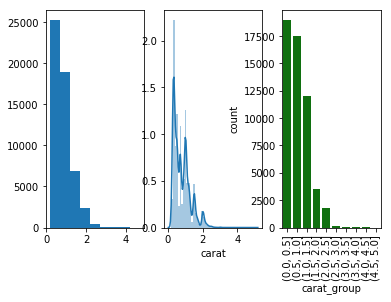

In [199]:
# univariate plot of carat weights

# isolate the carat value
c = diamonds['carat']

# print mean, median, standard dev
print("mean carat: ", c.mean())
print("median carat: ", c.median())
print("variance: ", c.var())
print("max: ", c.max())
print("min: ", c.min())
print("describe: ", diamonds['carat'].describe(include='all'))
print("carat under 1: ", c[c<1].count())
print("carat over 1: ", c[c>1].count())
print("percentage under 2: ", c[c<2].count()/c.count()*100)


# gets the range betwen the 75 and 25 percentile to see outliers
print("interquartile range: ", iqr(c))

# gets the skewness, if less than -1 or greater than +1 is
#highley skewed, symetric is between -1/2 and 1/2
print("skewness: ", c.skew())

# created carat groups by 0.5
carat_group = [0, .5, 1, 1.5,  2, 2.5, 3, 3.5, 4, 4.5, 5]
diamonds['carat_group'] = pd.cut(diamonds.carat, carat_group, right=True, include_lowest=False)


# get the extreme values and make interval 0.5
carat_edges = np.arange(c.min(), c.max(), 0.5)

# histogram chart
plt.subplot(1,3,1)
plt.hist(c, bins=carat_edges)

# distribution seaborn plot
plt.subplot(1,3,2)
sb.distplot(c)

# print group chart
plt.subplot(1,3,3)
plt.xticks(rotation=90)
sb.countplot(data=diamonds, x='carat_group', color='green')


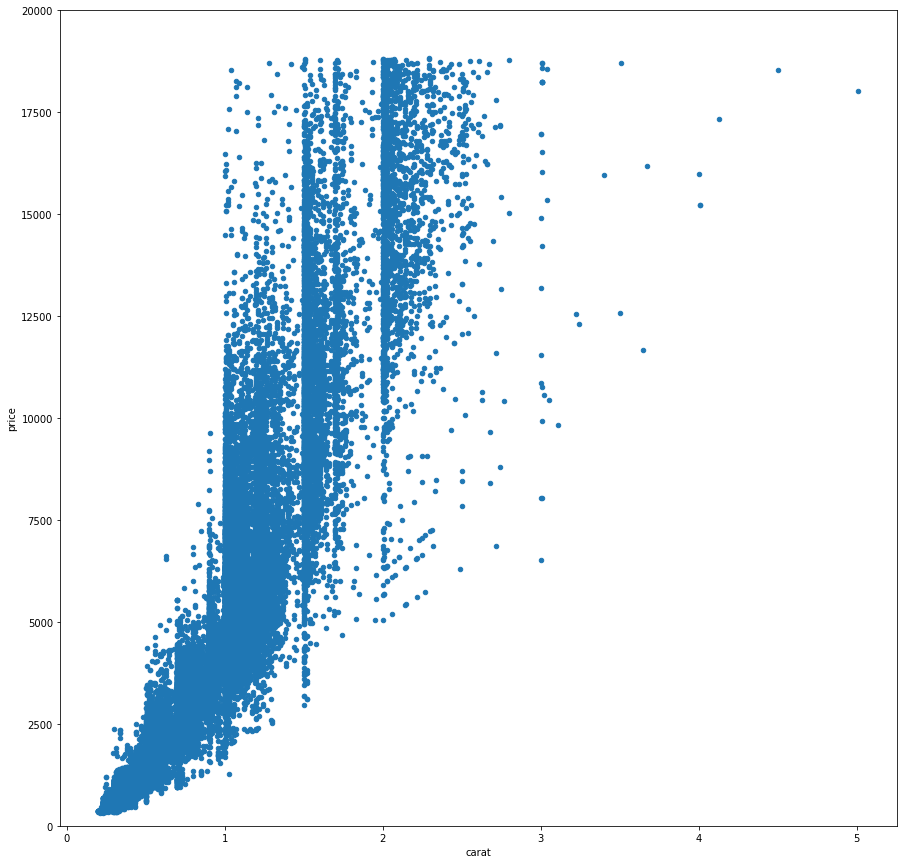

In [181]:
# scatter plot of carats and price
diamonds.plot(kind="scatter", x="carat", y="price", figsize=(15,15), ylim=(0,20000)) 

Carat distribution comment:

The carat distribution is similar to the price since they are closely correlated.  The smaller dimonds are more common then the rare big carat dimonds.  The min carat was .2 while the max was 5.  The mean dimonds were around 0.8 carats with a standard deviation of 0.47.  The skewness had a value of 1.1 which means it's skewed to to the right.  The median value was 0.7 so those were the most common carat sized dimonds.  There are a total of 53940 dimondas and 34880 are under 1 carat while 17502 are over 1 cart big.  96% of the dimonds are less than 2 carats big. The interesting pattern is that it is closely related to price, and there is a lot more dimonds that are under 1 carat and less than $5000.  There do seem to be some outliers when it comes to carats and the biggest ones are the most rare and are the most expensive. 

Now, let's move on to exploring the other three 'C' quality measures: cut, color, and clarity. For each of these measures, does the data we have tend to be higher on the quality scale, or lower?

In [138]:
# univariate plots of cut, color, and clarity grades

# isolate by cut, color, clarity
cut = diamonds.groupby('cut')
color = diamonds.groupby('color')
clarity = diamonds.groupby('clarity')

# find means by cut
cut.mean()

,carat,depth,table,price,x,y,z
cut,,,,,,,
Fair,1.046137,64.041677,59.053789,4358.757764,6.246894,6.182652,3.982770
Good,0.849185,62.365879,58.694639,3928.864452,5.838785,5.850744,3.639507
Ideal,0.702837,61.709401,55.951668,3457.541970,5.507451,5.520080,3.401448
Premium,0.891955,61.264673,58.746095,4584.257704,5.973887,5.944879,3.647124
Very Good,0.806381,61.818275,57.956150,3981.759891,5.740696,5.770026,3.559801


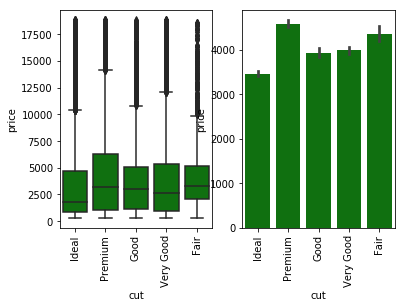

In [198]:
# create a plot with prices by cut and price
# box plot with cut
plt.subplot(1,2,1)
plt.xticks(rotation=90)
sb.boxplot(x="cut", y="price", data = diamonds, color='green')
# bar plot of cut
plt.subplot(1,2,2)
plt.xticks(rotation=90)
sb.barplot(x="cut", y="price", data = diamonds, color='green')

In [208]:
# find means by color
color.mean()

,carat,depth,table,price,x,y,z
color,,,,,,,
D,0.657795,61.698125,57.404590,3169.954096,5.417051,5.421128,3.342827
E,0.657867,61.662090,57.491201,3076.752475,5.411580,5.419029,3.340689
F,0.736538,61.694582,57.433536,3724.886397,5.614961,5.619456,3.464446
G,0.771190,61.757111,57.288629,3999.135671,5.677543,5.680192,3.505021
H,0.911799,61.836850,57.517811,4486.669196,5.983335,5.984815,3.695965
I,1.026927,61.846385,57.577278,5091.874954,6.222826,6.222730,3.845411
J,1.162137,61.887215,57.812393,5323.818020,6.519338,6.518105,4.033251


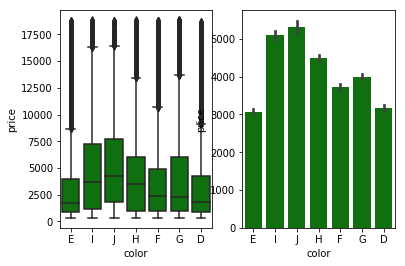

In [201]:
# create a plot by colot and price
# box plot of color
plt.subplot(1,2,1)
sb.boxplot(x="color", y="price", data = diamonds, color='green')
# bar plot of color
plt.subplot(1,2,2)
sb.barplot(x="color", y="price", data = diamonds, color='green')

In [159]:
# find means by clarity
clarity.mean()

,carat,depth,table,price,x,y,z
clarity,,,,,,,
I1,1.283846,62.734278,58.303779,3924.168691,6.761093,6.709379,4.207908
IF,0.505123,61.510615,56.507207,2864.839106,4.968402,4.989827,3.061659
SI1,0.850482,61.853042,57.662541,3996.001148,5.888383,5.888256,3.639845
SI2,1.077648,61.772167,57.927181,5063.028606,6.401370,6.397826,3.948478
VS1,0.727158,61.667458,57.315151,3839.455391,5.572178,5.581828,3.441007
VS2,0.763935,61.724417,57.417401,3924.989395,5.657709,5.658859,3.491478
VVS1,0.503321,61.624651,56.884460,2523.114637,4.960364,4.975075,3.061294
VVS2,0.596202,61.663778,57.024990,3283.737071,5.218454,5.232118,3.221465


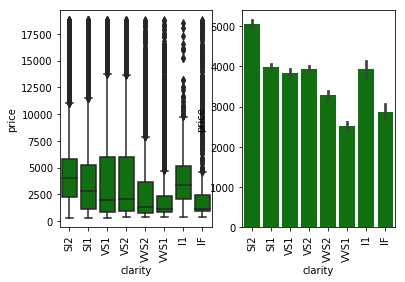

In [205]:
# create plots by clarity and price
# box plot by clarity
plt.subplot(1,2,1)
plt.xticks(rotation=90)
sb.boxplot(x="clarity", y="price", data = diamonds, color='green')
# bar plot by clarity
plt.subplot(1,2,2)
plt.xticks(rotation=90)
sb.barplot(x="clarity", y="price", data = diamonds, color='green')

In [161]:
# group by cut and color and get means by two variables
diamonds.groupby(['cut', 'color']).mean()

carat      depth      table        price         x  \
cut       color                                                          
Fair      D      0.920123  64.048466  58.969325  4291.061350  6.018344   
          E      0.856607  63.319643  59.364732  3682.312500  5.909063   
          F      0.904712  63.508013  59.453205  3827.003205  5.990513   
          G      1.023822  64.339809  58.773248  4239.254777  6.173822   
          H      1.219175  64.585149  58.696370  5135.683168  6.579373   
          I      1.198057  64.220571  59.237143  4685.445714  6.564457   
          J      1.341176  64.357143  58.917647  4975.655462  6.747311   
Good      D      0.744517  62.365710  58.541541  3405.382175  5.620076   
          E      0.745134  62.203751  58.779957  3423.644159  5.617889   
          F      0.775930  62.202310  58.910891  3495.750275  5.693443   
          G      0.850896  62.526636  58.471986  4123.482204  5.850264   
          H      0.914729  62.499573  58.611111  4276.254986  5.968789   
          I      1.057222  62.475096  58.773946  5078.532567  6.253544   
          J      1.099544  62.395765  58.813029  4574.172638  6.377003   
Ideal     D      0.565766  61.678370  55.965632  2629.094566  5.186704   
          E      0.578401  61.686677  55.967461  2597.550090  5.215762   
          F      0.655829  61.675562  55.924203  3374.939362  5.408751   
          G      0.700715  61.700164  55.902375  3720.706388  5.511214   
          H      0.799525  61.733194  55.965843  3889.334831  5.731377   
          I      0.913029  61.793598  56.021357  4451.970377  5.976197   
          J      1.063594  61.821987  56.012612  4918.186384  6.320045   
Premium   D      0.721547  61.169245  58.718964  3631.292576  5.599869   
          E      0.717745  61.175909  58.779461  3538.914420  5.587116   
          F      0.827036  61.259974  58.679279  4324.890176  5.876692   
          G      0.841488  61.279480  58.702360  4500.742134  5.864254   
          H      1.016449  61.322034  58.792034  5216.706780  6.244508   
          I      1.144937  61.328641  58.771849  5946.180672  6.489531   
          J      1.293094  61.390099  58.874752  6294.591584  6.809975   
Very Good D      0.696424  61.750165  58.041309  3470.467284  5.501210   
          E      0.676317  61.730250  58.038875  3214.652083  5.432467   
          F      0.740961  61.721627  57.848429  3778.820240  5.610504   
          G      0.766799  61.841279  57.784428  3872.753806  5.660204   
          H      0.915948  61.968366  57.903015  4535.390351  5.982286   
          I      1.046952  61.934551  58.105150  5255.879568  6.272259   
          J      1.133215  61.902065  58.277729  5103.513274  6.460782   

                        y         z  
cut       color                      
Fair      D      5.963190  3.839877  
          E      5.858214  3.722143  
          F      5.931122  3.787821  
          G      6.114076  3.963153  
          H      6.497393  4.219373  
          I      6.493486  4.193486  
          J      6.675882  4.319664  
Good      D      5.633897  3.504864  
          E      5.632454  3.496066  
          F      5.709659  3.544609  
          G      5.862824  3.647922  
          H      5.974245  3.726937  
          I      6.260536  3.901513  
          J      6.386026  3.977459  
Ideal     D      5.196224  3.201800  
          E      5.232214  3.220346  
          F      5.422250  3.338732  
          G      5.524007  3.403120  
          H      5.740446  3.539917  
          I      5.989479  3.695270  
          J      6.332098  3.912757  
Premium   D      5.571472  3.415926  
          E      5.558353  3.408875  
          F      5.844655  3.588391  
          G      5.833345  3.579641  
          H      6.228110  3.811699  
          I      6.453270  3.963894  
          J      6.770644  4.168020  
Very Good D      5.531613  3.405089  
          E      5.463213  3.373996  
          F      5.642717  3.472902  
          G      5.688752  

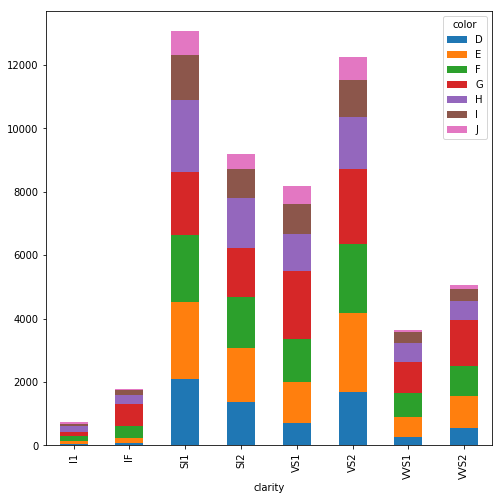

In [187]:
# plot clarity and color as a stacked bar graph
pd.crosstab(index=diamonds["clarity"], columns=diamonds["color"]).plot(kind="bar", figsize=(8,8), stacked=True)

General categorical feature comment:

Cut distribution comment:

If you group the diamonds together by cut and look at the mean prices, you see that the premium cuts are the most expensive and this would make sense since the better the cut is the more they should be able to charge. When you look at the cut and color together you see the most valuable are premium with a J color with a mean price of 6300.  The cuts are priced relatively the same, the ideal cut has the cheapest mean of around $3500 while the premium cut is around $4500 and the average price of the diamonds is $3900 while makes me think that the cut isn't as important when it comes to price and that the price is based more on carat.  The fair cuts seem to be bigger since their mean cut is a little over 1 carat while the ideal cuts have the smallest carats.  The relationship does seem to be linear between cut and price.   

Color distribution comment:

The gemological institue of America (GIA) grades diamonds according to color.  D-F is absolutley colorsless, IF is internally flawless, diamonds ranked G-J are almost colorless and K-M means diamond has light coloring.  
The J color was the most expensive and also have the highest mean carat size. Colors D and E were typically the smallest and had a mean price of around $3100. E was the cheapest color to get.  Diamonds colors have a bigger impact on price then clarity and cut.  I and J tended to be the bigger diamonds when it comes to color. J had a mean carat of 1.1 and costed around $5300. Their depths are relatively the same, they were around 61.  The tables were also very similar with an average number of 57.

Clarity distribution comment: 

Diamond clarity refers to the absense of inclusion and blemishes and how clear it is.  The order is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)).  The price does seem to follow a non linera relationship meaning that the clarity isn't as important as other factors.  When it comes to clarity you can clearly see from the last chart that most of the diamonds fall betwen the S1 and VS2 range while there are barely and I1 diamons.  It makes me think that the prices isn't as effected by clarity as it is by other factors such as cut and carat. 